## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4            Y
0   3.057286   966.385368  0.945275   6.416681   913.651946
1  44.453228  1144.843449  0.525932   4.975394   603.888126
2   5.252176  1631.219336  0.922349  10.395063  1504.554836
3  12.494751  1687.795362  0.629394   9.613041  1062.247312
4  58.339453  1181.057473  0.872546   9.522834  1032.293359


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0134189	total: 53.5ms	remaining: 53.5s
1:	learn: 1.0018953	total: 54.3ms	remaining: 27.1s
2:	learn: 0.9906271	total: 54.8ms	remaining: 18.2s
3:	learn: 0.9794615	total: 55.3ms	remaining: 13.8s
4:	learn: 0.9662882	total: 55.7ms	remaining: 11.1s
5:	learn: 0.9551147	total: 56.4ms	remaining: 9.34s
6:	learn: 0.9412373	total: 56.7ms	remaining: 8.05s
7:	learn: 0.9286648	total: 57.2ms	remaining: 7.09s
8:	learn: 0.9153178	total: 57.7ms	remaining: 6.36s
9:	learn: 0.9011731	total: 58.2ms	remaining: 5.76s
10:	learn: 0.8883438	total: 58.6ms	remaining: 5.27s
11:	learn: 0.8749643	total: 59ms	remaining: 4.86s
12:	learn: 0.8633698	total: 62ms	remaining: 4.7s
13:	learn: 0.8496381	total: 62.8ms	remaining: 4.42s
14:	learn: 0.8387653	total: 63.3ms	remaining: 4.16s
15:	learn: 0.8279852	total: 63.7ms	remaining: 3.92s
16:	learn: 0.8152518	total: 64.3ms	remaining: 3.72s
17:	learn: 0.8042723	total: 64.8ms	remaining: 3.54s
18:	learn: 0.7960608	total: 65.2ms	remaining: 3.3

86:	learn: 0.3322827	total: 97.3ms	remaining: 1.02s
87:	learn: 0.3286326	total: 97.9ms	remaining: 1.01s
88:	learn: 0.3250423	total: 98.4ms	remaining: 1.01s
89:	learn: 0.3217238	total: 98.9ms	remaining: 1s
90:	learn: 0.3181484	total: 99.4ms	remaining: 993ms
91:	learn: 0.3146877	total: 99.9ms	remaining: 986ms
92:	learn: 0.3105966	total: 100ms	remaining: 979ms
93:	learn: 0.3062080	total: 101ms	remaining: 972ms
94:	learn: 0.3023756	total: 101ms	remaining: 965ms
95:	learn: 0.2992475	total: 102ms	remaining: 959ms
96:	learn: 0.2956763	total: 102ms	remaining: 953ms
97:	learn: 0.2922319	total: 103ms	remaining: 947ms
98:	learn: 0.2884065	total: 103ms	remaining: 940ms
99:	learn: 0.2843247	total: 104ms	remaining: 932ms
100:	learn: 0.2807780	total: 104ms	remaining: 927ms
101:	learn: 0.2778282	total: 105ms	remaining: 921ms
102:	learn: 0.2746432	total: 105ms	remaining: 916ms
103:	learn: 0.2716026	total: 105ms	remaining: 908ms
104:	learn: 0.2679072	total: 106ms	remaining: 901ms
105:	learn: 0.2648476	t

260:	learn: 0.0680583	total: 180ms	remaining: 511ms
261:	learn: 0.0676522	total: 181ms	remaining: 510ms
262:	learn: 0.0673172	total: 182ms	remaining: 509ms
263:	learn: 0.0670259	total: 182ms	remaining: 508ms
264:	learn: 0.0664310	total: 183ms	remaining: 507ms
265:	learn: 0.0658800	total: 183ms	remaining: 505ms
266:	learn: 0.0654997	total: 184ms	remaining: 504ms
267:	learn: 0.0651561	total: 184ms	remaining: 503ms
268:	learn: 0.0647192	total: 184ms	remaining: 501ms
269:	learn: 0.0644388	total: 185ms	remaining: 499ms
270:	learn: 0.0639841	total: 185ms	remaining: 498ms
271:	learn: 0.0637175	total: 186ms	remaining: 497ms
272:	learn: 0.0633409	total: 186ms	remaining: 495ms
273:	learn: 0.0628833	total: 187ms	remaining: 495ms
274:	learn: 0.0625420	total: 187ms	remaining: 493ms
275:	learn: 0.0621049	total: 188ms	remaining: 492ms
276:	learn: 0.0616407	total: 188ms	remaining: 490ms
277:	learn: 0.0612672	total: 188ms	remaining: 489ms
278:	learn: 0.0610132	total: 189ms	remaining: 488ms
279:	learn: 

450:	learn: 0.0274227	total: 274ms	remaining: 333ms
451:	learn: 0.0273825	total: 274ms	remaining: 332ms
452:	learn: 0.0272351	total: 274ms	remaining: 331ms
453:	learn: 0.0270576	total: 275ms	remaining: 330ms
454:	learn: 0.0270068	total: 275ms	remaining: 330ms
455:	learn: 0.0268664	total: 276ms	remaining: 329ms
456:	learn: 0.0268166	total: 276ms	remaining: 328ms
457:	learn: 0.0267202	total: 277ms	remaining: 327ms
458:	learn: 0.0265483	total: 277ms	remaining: 326ms
459:	learn: 0.0264647	total: 277ms	remaining: 326ms
460:	learn: 0.0263705	total: 278ms	remaining: 325ms
461:	learn: 0.0263226	total: 278ms	remaining: 324ms
462:	learn: 0.0262092	total: 278ms	remaining: 323ms
463:	learn: 0.0261171	total: 279ms	remaining: 322ms
464:	learn: 0.0259524	total: 280ms	remaining: 322ms
465:	learn: 0.0259062	total: 282ms	remaining: 323ms
466:	learn: 0.0257532	total: 283ms	remaining: 322ms
467:	learn: 0.0257080	total: 283ms	remaining: 322ms
468:	learn: 0.0256633	total: 284ms	remaining: 321ms
469:	learn: 

619:	learn: 0.0154153	total: 361ms	remaining: 221ms
620:	learn: 0.0153596	total: 362ms	remaining: 221ms
621:	learn: 0.0152749	total: 362ms	remaining: 220ms
622:	learn: 0.0152055	total: 362ms	remaining: 219ms
623:	learn: 0.0151857	total: 363ms	remaining: 219ms
624:	learn: 0.0151086	total: 363ms	remaining: 218ms
625:	learn: 0.0150894	total: 364ms	remaining: 217ms
626:	learn: 0.0150180	total: 364ms	remaining: 217ms
627:	learn: 0.0150087	total: 365ms	remaining: 216ms
628:	learn: 0.0149900	total: 365ms	remaining: 215ms
629:	learn: 0.0149181	total: 366ms	remaining: 215ms
630:	learn: 0.0148522	total: 366ms	remaining: 214ms
631:	learn: 0.0148432	total: 366ms	remaining: 213ms
632:	learn: 0.0147834	total: 367ms	remaining: 213ms
633:	learn: 0.0147745	total: 367ms	remaining: 212ms
634:	learn: 0.0147567	total: 368ms	remaining: 211ms
635:	learn: 0.0146869	total: 368ms	remaining: 211ms
636:	learn: 0.0146174	total: 369ms	remaining: 210ms
637:	learn: 0.0145643	total: 369ms	remaining: 209ms
638:	learn: 

800:	learn: 0.0092243	total: 453ms	remaining: 112ms
801:	learn: 0.0091744	total: 453ms	remaining: 112ms
802:	learn: 0.0091660	total: 454ms	remaining: 111ms
803:	learn: 0.0091622	total: 454ms	remaining: 111ms
804:	learn: 0.0091580	total: 454ms	remaining: 110ms
805:	learn: 0.0091479	total: 455ms	remaining: 109ms
806:	learn: 0.0091398	total: 455ms	remaining: 109ms
807:	learn: 0.0091299	total: 456ms	remaining: 108ms
808:	learn: 0.0091262	total: 456ms	remaining: 108ms
809:	learn: 0.0091221	total: 457ms	remaining: 107ms
810:	learn: 0.0091123	total: 457ms	remaining: 107ms
811:	learn: 0.0090635	total: 458ms	remaining: 106ms
812:	learn: 0.0090557	total: 458ms	remaining: 105ms
813:	learn: 0.0090290	total: 458ms	remaining: 105ms
814:	learn: 0.0089780	total: 459ms	remaining: 104ms
815:	learn: 0.0089744	total: 460ms	remaining: 104ms
816:	learn: 0.0089244	total: 460ms	remaining: 103ms
817:	learn: 0.0089203	total: 461ms	remaining: 102ms
818:	learn: 0.0088837	total: 461ms	remaining: 102ms
819:	learn: 

971:	learn: 0.0057721	total: 541ms	remaining: 15.6ms
972:	learn: 0.0057683	total: 542ms	remaining: 15ms
973:	learn: 0.0057554	total: 543ms	remaining: 14.5ms
974:	learn: 0.0057486	total: 543ms	remaining: 13.9ms
975:	learn: 0.0057204	total: 544ms	remaining: 13.4ms
976:	learn: 0.0057077	total: 544ms	remaining: 12.8ms
977:	learn: 0.0057039	total: 545ms	remaining: 12.3ms
978:	learn: 0.0056915	total: 545ms	remaining: 11.7ms
979:	learn: 0.0056588	total: 545ms	remaining: 11.1ms
980:	learn: 0.0056286	total: 546ms	remaining: 10.6ms
981:	learn: 0.0056098	total: 546ms	remaining: 10ms
982:	learn: 0.0056061	total: 547ms	remaining: 9.46ms
983:	learn: 0.0055766	total: 547ms	remaining: 8.9ms
984:	learn: 0.0055635	total: 548ms	remaining: 8.34ms
985:	learn: 0.0055599	total: 548ms	remaining: 7.78ms
986:	learn: 0.0055415	total: 549ms	remaining: 7.22ms
987:	learn: 0.0055280	total: 549ms	remaining: 6.67ms
988:	learn: 0.0055155	total: 550ms	remaining: 6.11ms
989:	learn: 0.0054842	total: 550ms	remaining: 5.56m

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

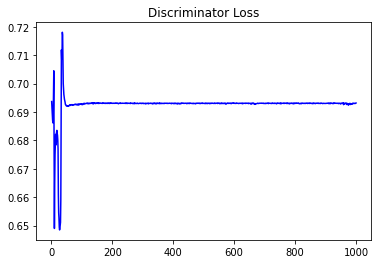

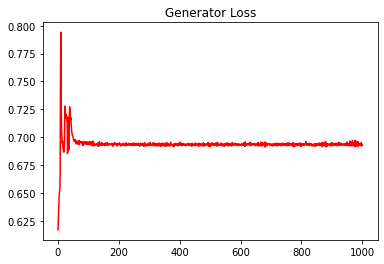

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.004211289514783815


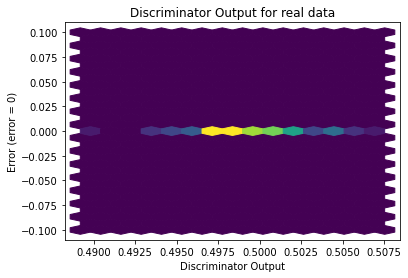

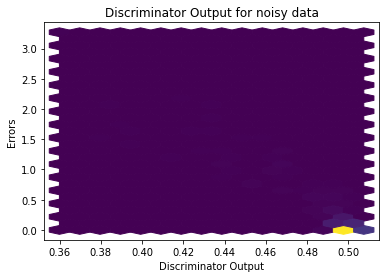

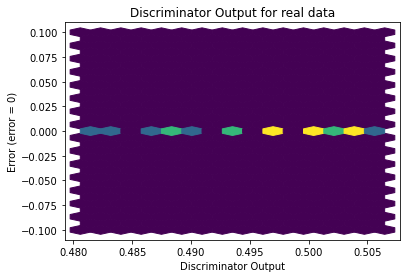

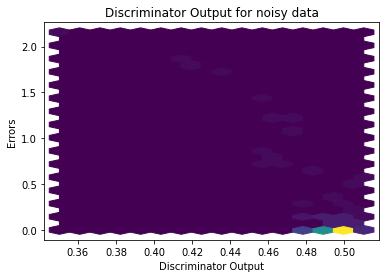

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


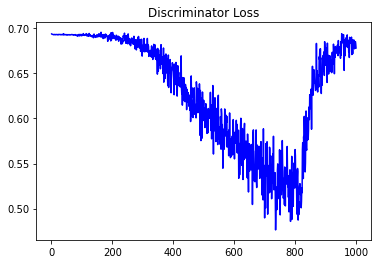

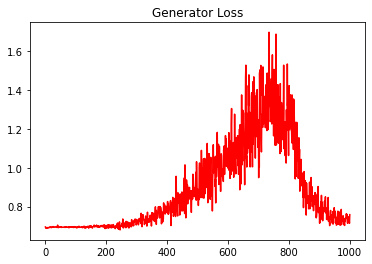

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.0038444328608077285


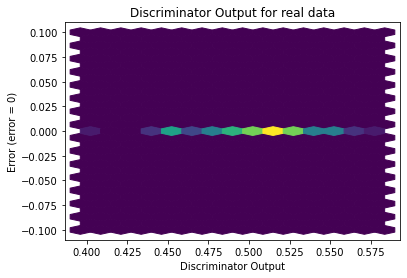

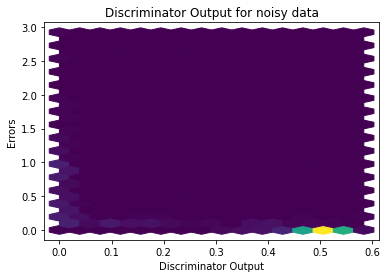

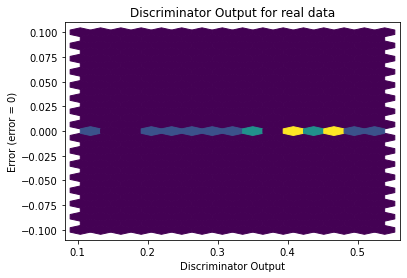

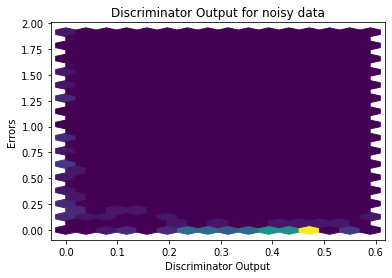

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0357]], requires_grad=True)
